In [1]:
import matplotlib.pyplot as plt

make some mock data

In [2]:
import numpy as np
from astropy.table import Table

n = 100
ra = np.random.uniform(0, 0.1, n)
dec = np.random.uniform(-0.05, 0.05, n)
mag = np.random.uniform(24., 27., n)

true = Table({'ra': ra, 'dec': dec, 'mag': mag})
pred = Table({'ra': ra+np.random.normal(0, 0.1, n), 'dec': dec+np.random.normal(0, 0.1, n), 'mag': mag+np.random.normal(0, 0.1, n)})


In [3]:
pos_true = np.vstack([ra, dec]).T
pos_pred = np.vstack([pred['ra'].value, pred['dec'].value]).T

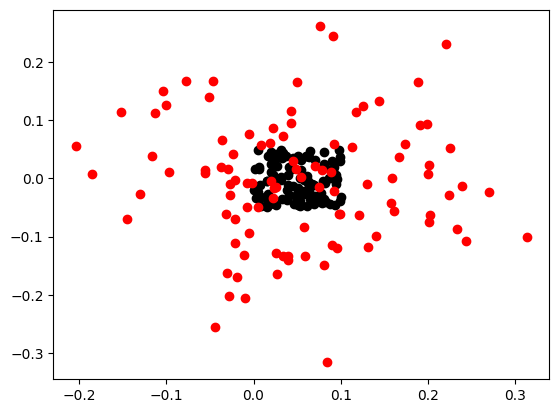

In [4]:
plt.scatter(pos_true[:, 0], pos_true[:, 1], c='k')
plt.scatter(pos_pred[:, 0], pos_pred[:, 1], c='r')


perform a matching

In [5]:
from scipy.spatial import KDTree
tree_true = KDTree(pos_true) # kdtree 
tree_pred = KDTree(pos_pred)

In [6]:
matches = tree_true.query_ball_tree(tree_pred, r=0.01)

In [7]:
matches

[[],
 [],
 [],
 [],
 [],
 [27],
 [],
 [],
 [],
 [],
 [54],
 [],
 [],
 [21],
 [],
 [],
 [59],
 [],
 [],
 [],
 [],
 [],
 [10],
 [],
 [],
 [10],
 [],
 [],
 [36],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [20],
 [],
 [],
 [10],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [83],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [36],
 [],
 [],
 [70],
 [],
 [],
 [10],
 [21],
 [],
 [27],
 [],
 [],
 [],
 [21],
 [59],
 [],
 [],
 [],
 [27],
 [],
 [],
 [],
 [],
 [],
 [27],
 [10],
 [],
 [59],
 [],
 [54],
 [],
 [36],
 [],
 [],
 [],
 [35]]

true IDs that never found a match in the predicted catalog

In [8]:
id_lost = []
for i, true_id in enumerate(matches):
    if true_id == []:
        id_lost.append(i)
id_lost

[0,
 1,
 2,
 3,
 4,
 6,
 7,
 8,
 9,
 11,
 12,
 14,
 15,
 17,
 18,
 19,
 20,
 21,
 23,
 24,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 68,
 69,
 72,
 74,
 75,
 76,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 87,
 90,
 92,
 94,
 96,
 97,
 98]

IDs that were predicted but didn't match to truth

In [9]:
flatmatch = set([x for match in matches for x in match])

In [10]:
all_pred_ids = set(range(len(pred)))

In [26]:
id_found = list(all_pred_ids - flatmatch)

In [27]:
# from astropy.table import Table
# def count_matches(match_info):
#     """For each group the number of matches in that group"""
    
#     _, counts = np.unique(match_info['group_id'], return_counts=True)
#     return counts - 1

class for match info

In [22]:
class match_info():
    def __init__(self, matches, true_inds, pred_inds, ancil=None):
        assert(len(matches) == len(true_inds))
        # generalize this later
        
        self.matches = matches
        self.lost = self.__get_lost__()
        self.found = self.__get_found__(pred_inds)
        
    def __get_lost__(self):
        id_lost = []
        for i, true_id in enumerate(self.matches):
            if true_id == []:
                id_lost.append(i)
        return(id_lost)
    
    def __get_found__(self, pred_inds):
        all_pred_ids = set(pred_inds)
        flatmatch = set([x for match in self.matches for x in match])
        id_found = all_pred_ids - flatmatch
        return(list(id_found))
    
    def count_matches(self):
        counts = [len(match) for match in self.matches]
        return(counts)
    
    # the non-image metrics here
    
    def __str__(self):
        # gives IQR of matches, count lost, count found
        return('hello world')

In [23]:
test_match = match_info(matches, list(range(n)), list(range(n)))

In [24]:
test_match.lost == id_lost

True

In [28]:
test_match.found == id_found

True

In [29]:
test_match.count_matches()

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1]

easy metrics

(array([ 7.,  7., 13.,  9.,  7.,  7.,  5.,  9.,  7.,  5.]),
 array([23.93578474, 24.25034685, 24.56490895, 24.87947106, 25.19403316,
        25.50859527, 25.82315738, 26.13771948, 26.45228159, 26.7668437 ,
        27.0814058 ]),
 <BarContainer object of 10 artists>)

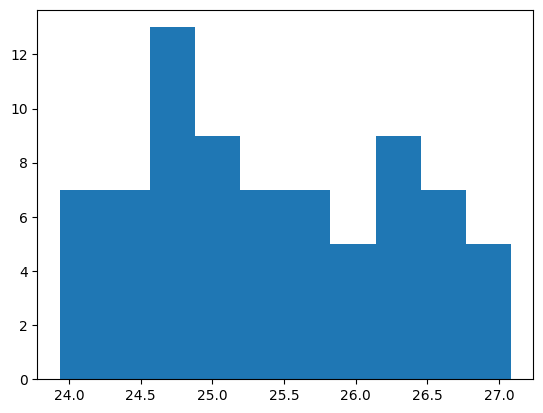

In [31]:
plt.hist(true['mag'][test_match.lost])

(array([11.,  6., 13.,  9., 11.,  7.,  6., 13.,  5.,  9.]),
 array([24.01460373, 24.31043074, 24.60625775, 24.90208475, 25.19791176,
        25.49373877, 25.78956577, 26.08539278, 26.38121979, 26.6770468 ,
        26.9728738 ]),
 <BarContainer object of 10 artists>)

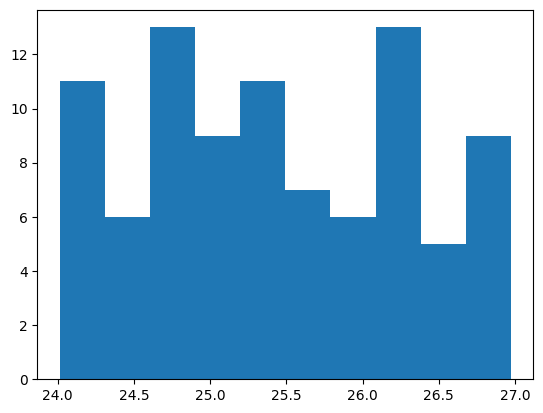

In [32]:
plt.hist(pred['mag'][test_match.found])